In [2]:
# https://www.datacamp.com/tutorial/variance-inflation-factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.datasets import load_breast_cancer


In [4]:
cancer = load_breast_cancer()
train = pd.DataFrame(cancer.data, columns=cancer.feature_names)

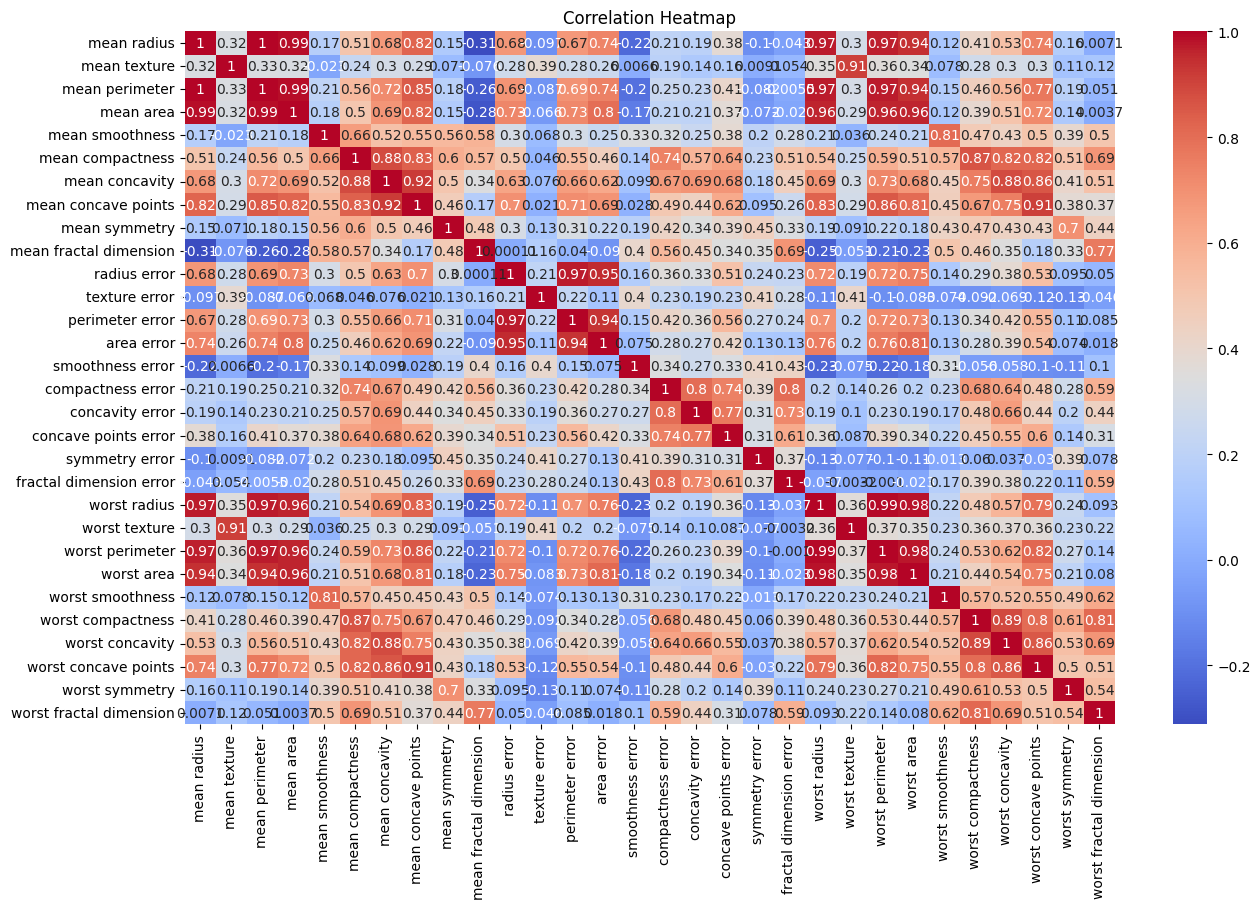

In [5]:
plt.figure(figsize=(15, 9))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Add a constant to the model (intercept)
X = add_constant(X)

# Calculate VIF for each feature
datacamp_vif_data = pd.DataFrame()
datacamp_vif_data['Feature'] = X.columns
datacamp_vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(datacamp_vif_data)

                    Feature          VIF
0                     const  1868.188844
1               mean radius  3806.115296
2              mean texture    11.884048
3            mean perimeter  3786.400419
4                 mean area   347.878657
5           mean smoothness     8.194282
6          mean compactness    50.505168
7            mean concavity    70.767720
8       mean concave points    60.041733
9             mean symmetry     4.220656
10   mean fractal dimension    15.756977
11             radius error    75.462027
12            texture error     4.205423
13          perimeter error    70.359695
14               area error    41.163091
15         smoothness error     4.027923
16        compactness error    15.366324
17          concavity error    15.694833
18     concave points error    11.520796
19           symmetry error     5.175426
20  fractal dimension error     9.717987
21             worst radius   799.105946
22            worst texture    18.569966
23          wors

In [9]:
X = train.drop(columns=['mean perimeter','mean area'])

# Add a constant to the model (intercept)
X = add_constant(X)

# Calculate VIF for each feature
datacamp_vif_data = pd.DataFrame()
datacamp_vif_data['Feature'] = X.columns
datacamp_vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(datacamp_vif_data)

                    Feature          VIF
0                     const  1545.416667
1               mean radius    60.805149
2              mean texture    11.838398
3           mean smoothness     7.964388
4          mean compactness    32.063497
5            mean concavity    65.827167
6       mean concave points    59.868889
7             mean symmetry     4.185354
8    mean fractal dimension    15.302462
9              radius error    72.416620
10            texture error     4.138842
11          perimeter error    65.281857
12               area error    38.523621
13         smoothness error     3.959347
14        compactness error    15.346441
15          concavity error    14.706554
16     concave points error    10.469200
17           symmetry error     5.159940
18  fractal dimension error     9.659603
19             worst radius   487.447470
20            worst texture    18.453773
21          worst perimeter   346.580585
22               worst area   117.021720
23         worst

In [20]:
test = X = train.drop(columns=['smoking','waist(cm)','LDL'])

# Add a constant to the model (intercept)
X = add_constant(X)

# Calculate VIF for each feature
datacamp_vif_data = pd.DataFrame()
datacamp_vif_data['Feature'] = X.columns
datacamp_vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(datacamp_vif_data)

                Feature          VIF
0                 const  1035.226619
1                    id     1.000127
2                   age     1.691357
3            height(cm)     2.702677
4            weight(kg)     2.603727
5        eyesight(left)     1.294925
6       eyesight(right)     1.303016
7         hearing(left)     1.464060
8        hearing(right)     1.465080
9              systolic     2.449036
10           relaxation     2.408762
11  fasting blood sugar     1.123454
12          Cholesterol     1.270544
13         triglyceride     1.742836
14                  HDL     1.760492
15           hemoglobin     1.842390
16        Urine protein     1.005057
17     serum creatinine     1.405213
18                  AST     1.742099
19                  ALT     1.983039
20                  Gtp     1.331283
21        dental caries     1.021529
